# U.S. Medical Insurance Costs Project

In [1]:
import pandas as pd
insurance=pd.read_csv('insurance.csv')

In [2]:
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
insurance.describe(include='all') # get basic descriptive stats

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [4]:
sex_count=insurance.groupby('sex')['age'].count()# female vs male count
print(sex_count)

sex
female    662
male      676
Name: age, dtype: int64


In [5]:
count_by_region=insurance['region'].value_counts()
print(count_by_region)

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [6]:
total=sex_count[0]+sex_count[1]
female=sex_count[0]/total
male=sex_count[1]/total
print("Female population of dataset: {female:.2%}".format(female=female))
print("Male population of dataset: {male:.2%}".format(male=male))

Female population of dataset: 49.48%
Male population of dataset: 50.52%


In [7]:
average_age=insurance['age'].mean()
print("The average age is {age:.0f}".format(age=average_age))

The average age is 39


In [8]:
average_bmi=insurance['bmi'].mean()
print("The average bmi is {bmi:.2f}".format(bmi=average_bmi))

The average bmi is 30.66


In [9]:
average_cost=insurance['charges'].mean()
print("The average charge is ${charge:,.2f}".format(charge=average_cost))

The average charge is $13,270.42


In [10]:
insurance.groupby("sex")['bmi'].mean()  #average bmi by gender

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

In [11]:
insurance.groupby('smoker')['bmi'].mean() #average bmi if smoker

smoker
no     30.651795
yes    30.708449
Name: bmi, dtype: float64

In [12]:
insurance.groupby('region')['charges'].mean().sort_values(ascending=False) #charges by region in descending order

region
southeast    14735.411438
northeast    13406.384516
northwest    12417.575374
southwest    12346.937377
Name: charges, dtype: float64

<AxesSubplot:ylabel='Frequency'>

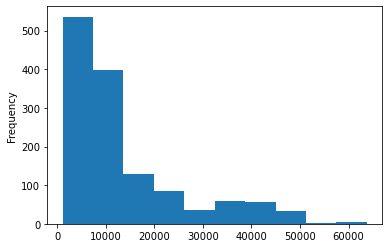

In [13]:
insurance['charges'].plot.hist() #histogram of cost distribution

In [14]:
insurance.groupby(['sex','smoker'])['charges'].mean() # charges by sex then if smoker

sex     smoker
female  no         8762.297300
        yes       30678.996276
male    no         8087.204731
        yes       33042.005975
Name: charges, dtype: float64

In [15]:
insurance['children'].value_counts()   # children frequency

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [16]:
one_child=insurance[insurance['children']==1]
len(one_child) #number should equal to the number in code output above for 1 child

324

In [17]:
one_child['charges'].mean() #average charge for a person with one kid

12731.171831635793

In [18]:
# function that subsets the insurance dataset based on number of children
def numchild_subset(dataset,num_child):
    subset=dataset[dataset['children']==num_child].reset_index(drop=True)
    return subset

In [19]:
child0=numchild_subset(insurance,0)

In [20]:
child1=numchild_subset(insurance,1)

In [21]:
child2=numchild_subset(insurance,2)

In [22]:
child3=numchild_subset(insurance,3)

In [23]:
child4=numchild_subset(insurance,4)

In [24]:
child5=numchild_subset(insurance,5)

In [25]:
print("Average charges for people with 0 children are ${charges:,.0f}".format(charges=child0['charges'].mean()))
print("Average charges for people with 1 child are ${charges:,.0f}".format(charges=child1['charges'].mean()))
print("Average charges for people with 2 children are ${charges:,.0f}".format(charges=child2['charges'].mean()))
print("Average charges for people with 3 children are ${charges:,.0f}".format(charges=child3['charges'].mean()))
print("Average charges for people with 4 children are ${charges:,.0f}".format(charges=child4['charges'].mean()))
print("Average charges for people with 5 children are ${charges:,.0f}".format(charges=child5['charges'].mean()))

Average charges for people with 0 children are $12,366
Average charges for people with 1 child are $12,731
Average charges for people with 2 children are $15,074
Average charges for people with 3 children are $15,355
Average charges for people with 4 children are $13,851
Average charges for people with 5 children are $8,786
